<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Object Detection**

Metode yang digunakan:
  1. Template Matching
  2. Edge Detection
  3. Corner Detection
  4. Grid Detection 
  5. Contour Detection

In [23]:
#import library yang dibutuhkan 
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt 

In [10]:
#akses drive
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Template Matching**

Menggunakan library openCV:

**cv.matchTemplate**(), dengan parameter:

*   **Image**: citra input 
*   **templ**: template yang dicari, ukurannya tidak boleh lebih besar dari citra input 
*  **method**: metode dari template matching

Jenis metode template matching di OpenCV:

1.  TM_SQDIFF
2.  TM_SQDIFF_NORMED
3.  TM_CCORR
4.  TM_CCORR_NORMED
5.  TM_CCOEFF
6.  TM_CCOEFF_NORMED 






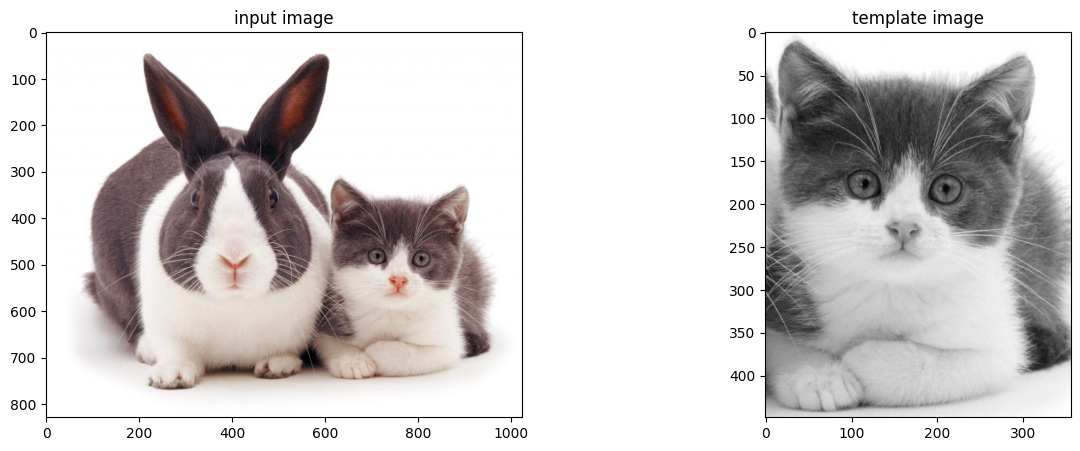

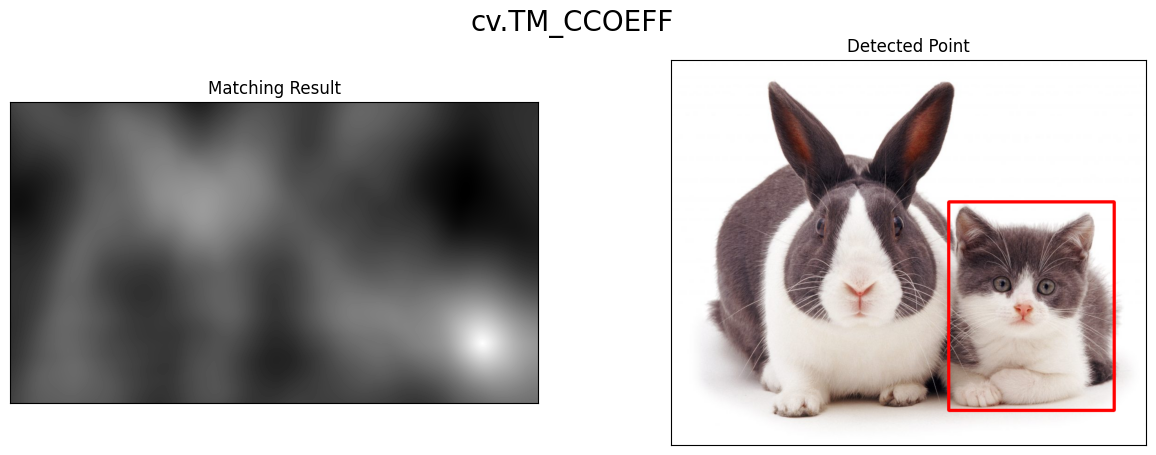

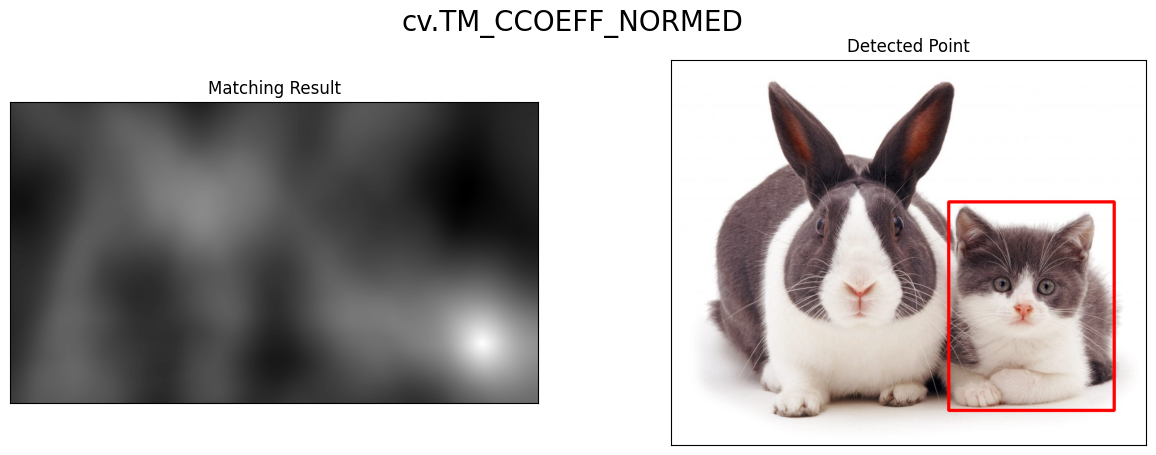

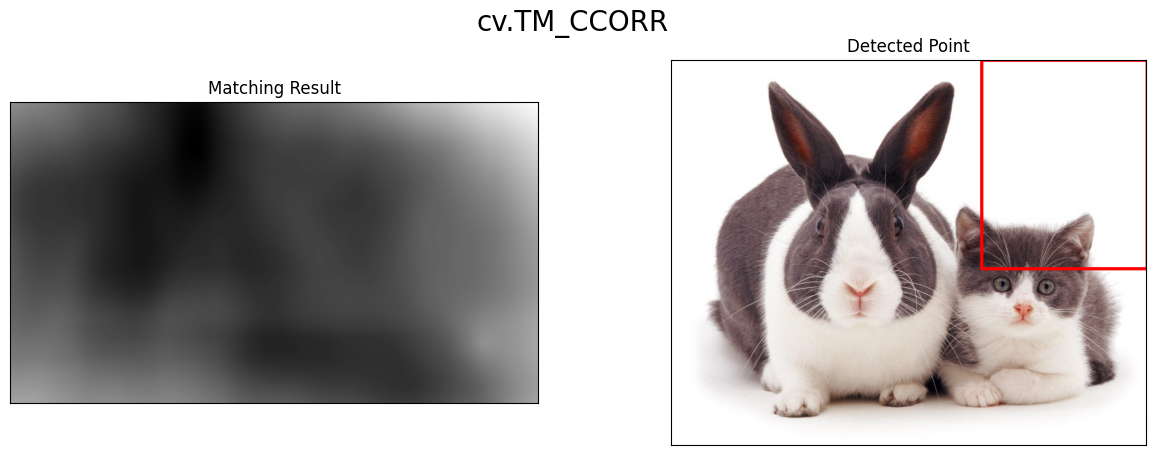

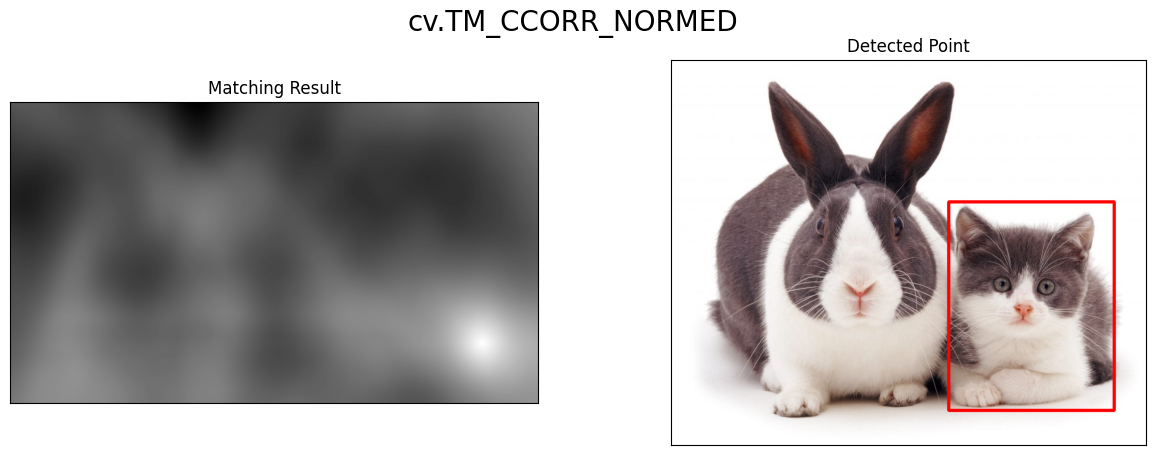

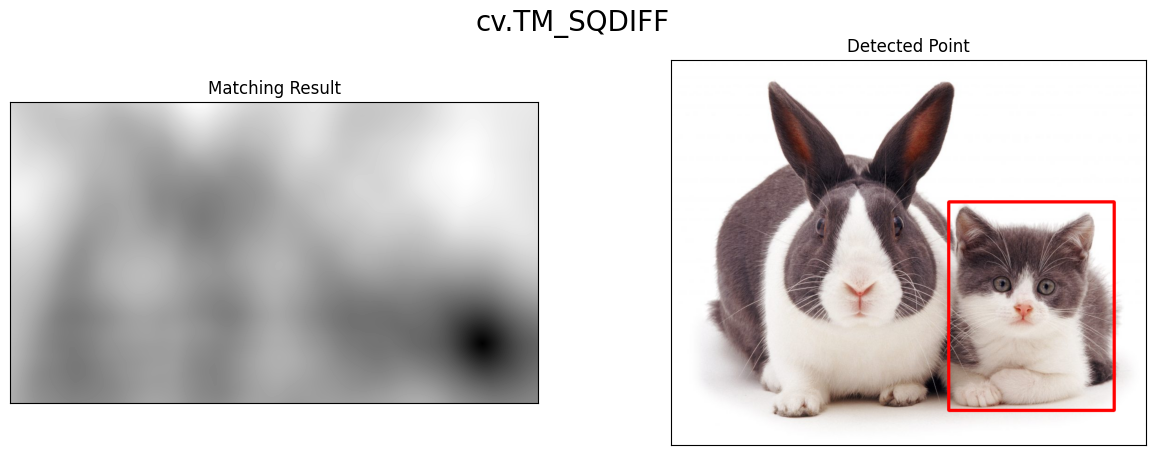

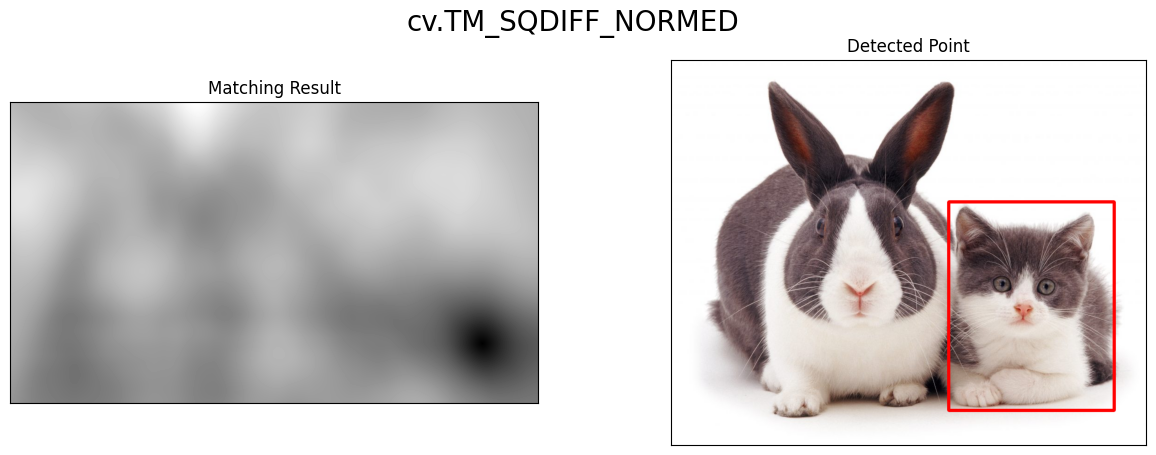

In [7]:
#Nomor 2 (Implementasikan 6 metode template matching pada OpenCV)

# load citra input 
img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = img1.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Image/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Daftar Metode yang digunakan
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
            
for meth in methods:
    img = img2.copy()
    method = eval(meth)
  # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
  # jika method yang dijalankan TM_SQDIFF atau TM_SQDIFF_NORMED, menggunakan nilai minimum
  # jika bukan maka memilih nilai maks  
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),6)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

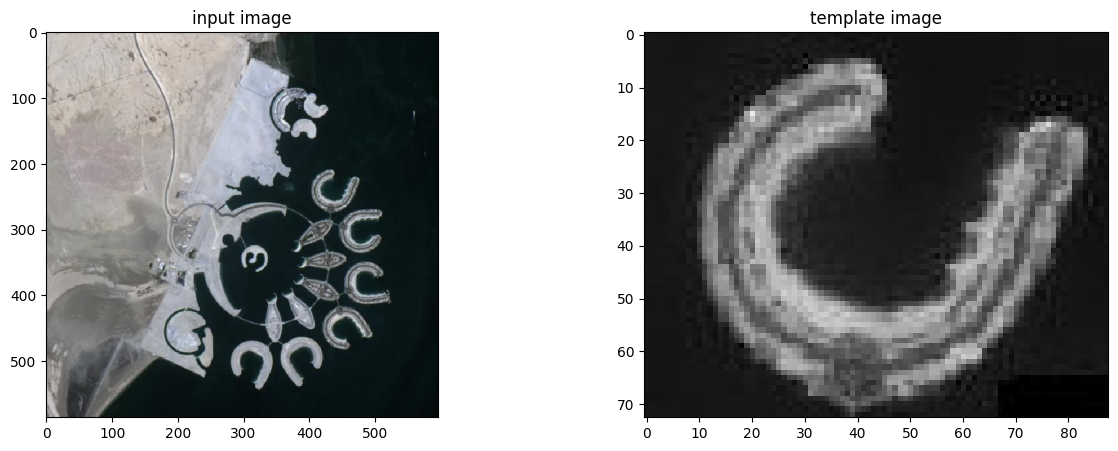

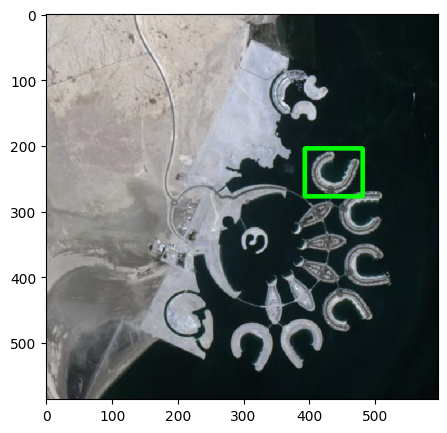

In [31]:
#Nomor 2 (Implementasikan 6 metode template matching pada OpenCV)
# load citra input 
img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/bahrain.jpg')
img_gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = img1.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Image/bahrain-template.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt.subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Apply template Matching
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# memilih nilai maks  
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# membuat rectangle pada citra input
cv.rectangle(img2,top_left, bottom_right,(0,255,0),6)

# print citra input dengan rectangle
plt.figure(figsize=(15,5))
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian 
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

###**Sobel Edge Detection**

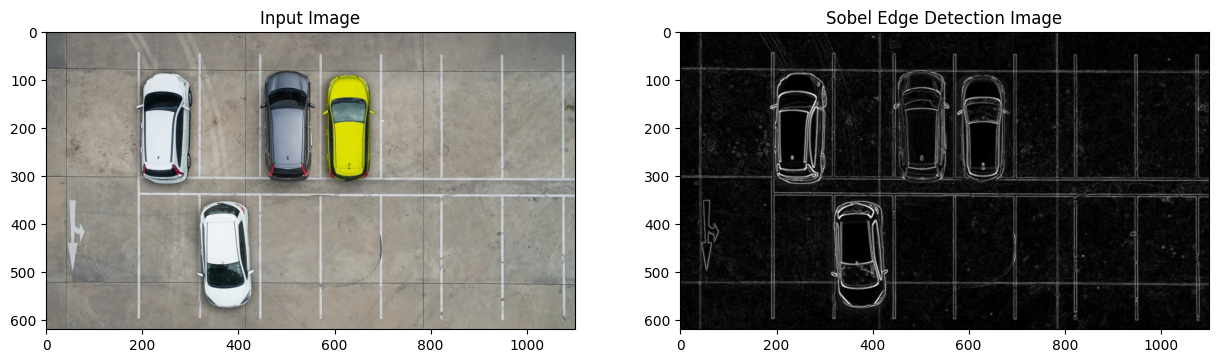

In [36]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/car-park.jpg') 

# converting to gray scale
gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

# remove noise
gray = cv.GaussianBlur(gray, (3,3), 0)

# obtaining a horizontal and vertical Sobel filtering of the image
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
sobel = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)

f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
axarr[0].set_title("Input Image")
axarr[1].imshow(sobel, cmap='gray')
axarr[1].set_title("Sobel Edge Detection Image")
plt.show()

###**Canny Edge Detection**

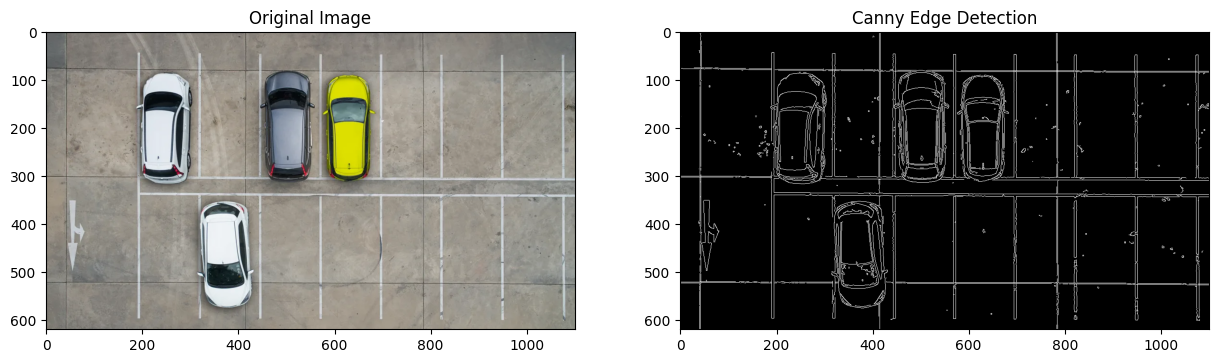

In [35]:
image_original = cv.imread('/content/drive/MyDrive/PCVK/Image/car-park.jpg')
gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray, 100, 200)

# Plot outputs
f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')
plt.subplot(122), plt.imshow(edged, cmap = 'gray')
axarr[1].set_title('Canny Edge Detection Image')
plt.show()

###**Laplacian Edge Detection**

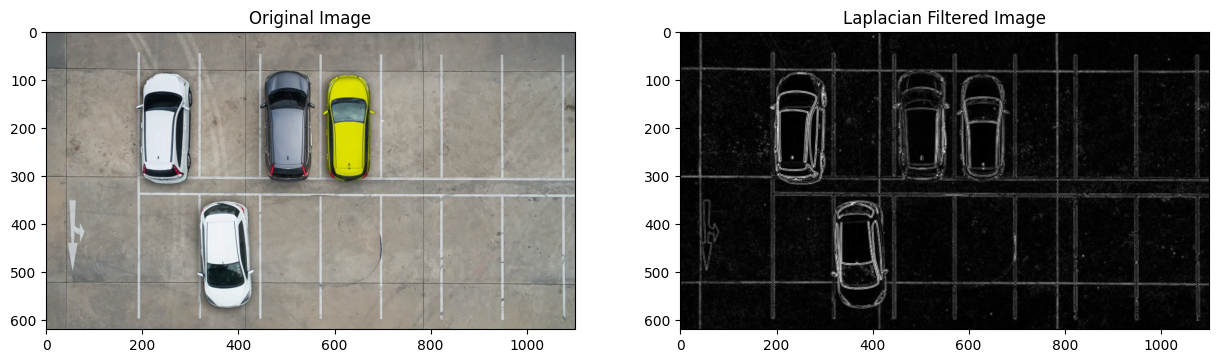

In [20]:
image_original = cv.imread('/content/drive/MyDrive/PCVK/Image/car-park.jpg')
# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg

###**Harris Corner Detection** 

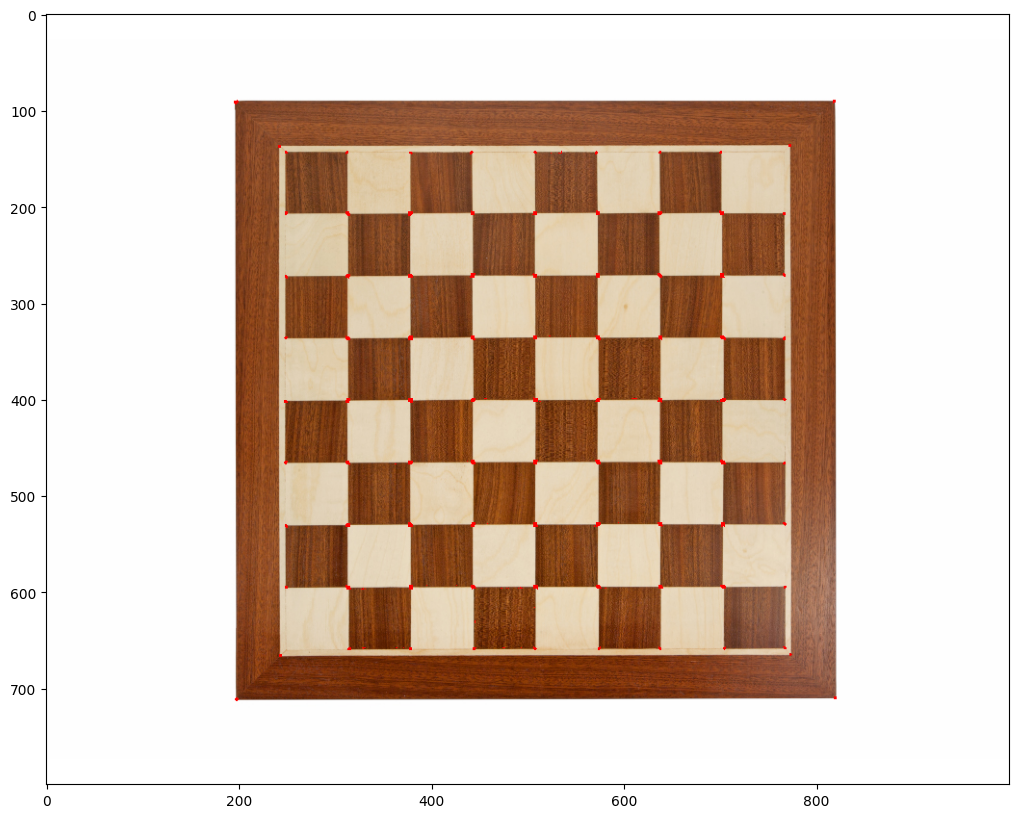

In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input 
input_img = cv.imread('/content/drive/MyDrive/PCVK/Image/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
hcd = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[hcd>0.01*hcd.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

###**Shi-Tomasi Detection** 

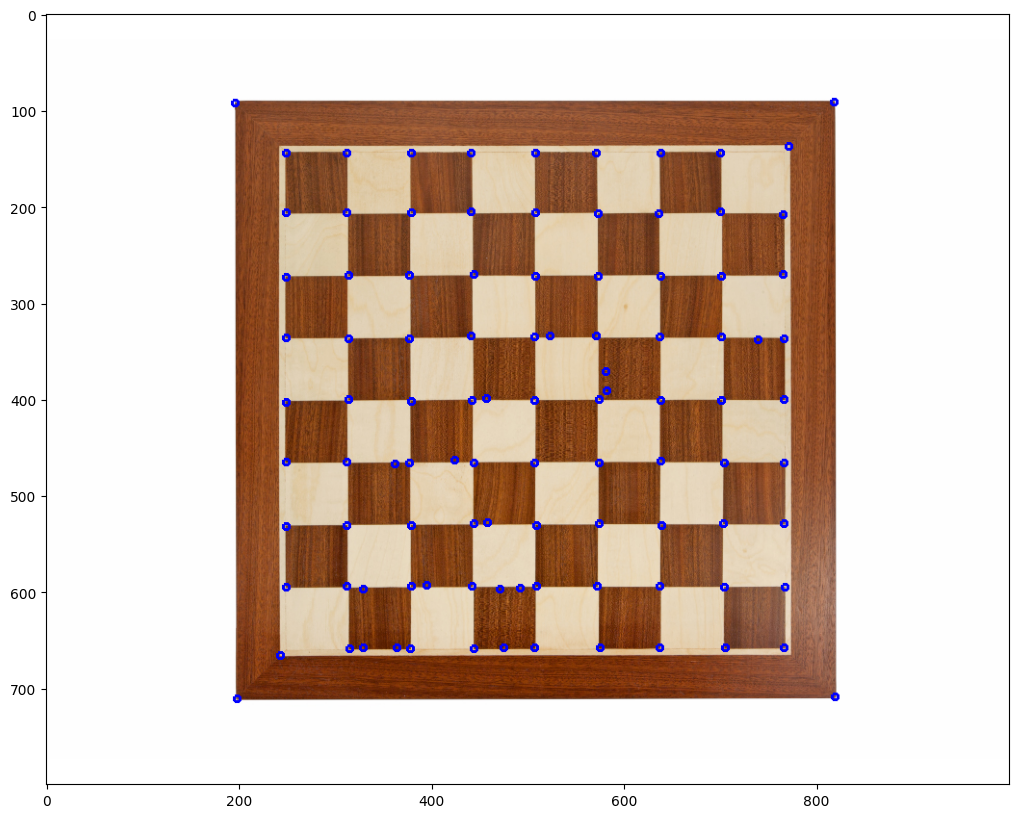

In [14]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Image/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

#100 =  jumlah sudut yg ingin dideteksi
#0.01 = parameter quality level
#10 = parameter minimum distance between detected corners
corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
#looping pada setiap sudut yang dideteksi 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan 
gambar sudoku.jpg

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


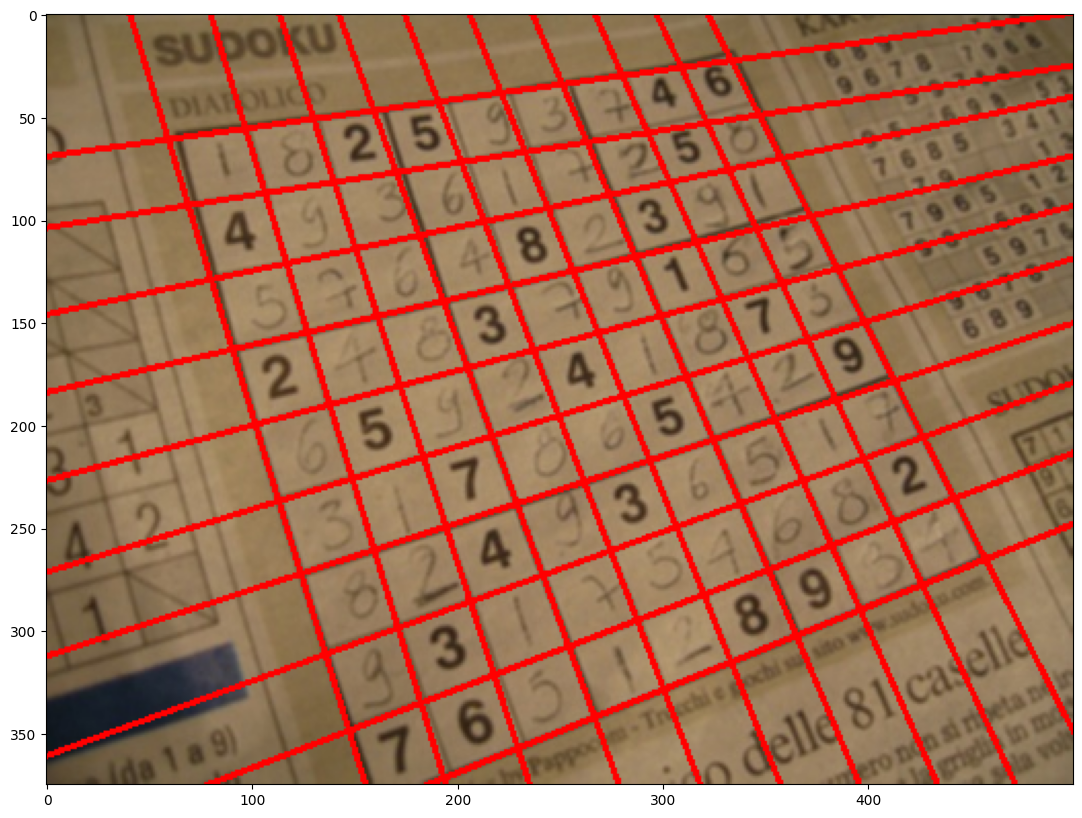

In [15]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Image/sudoku.jpg') 
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))


7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg

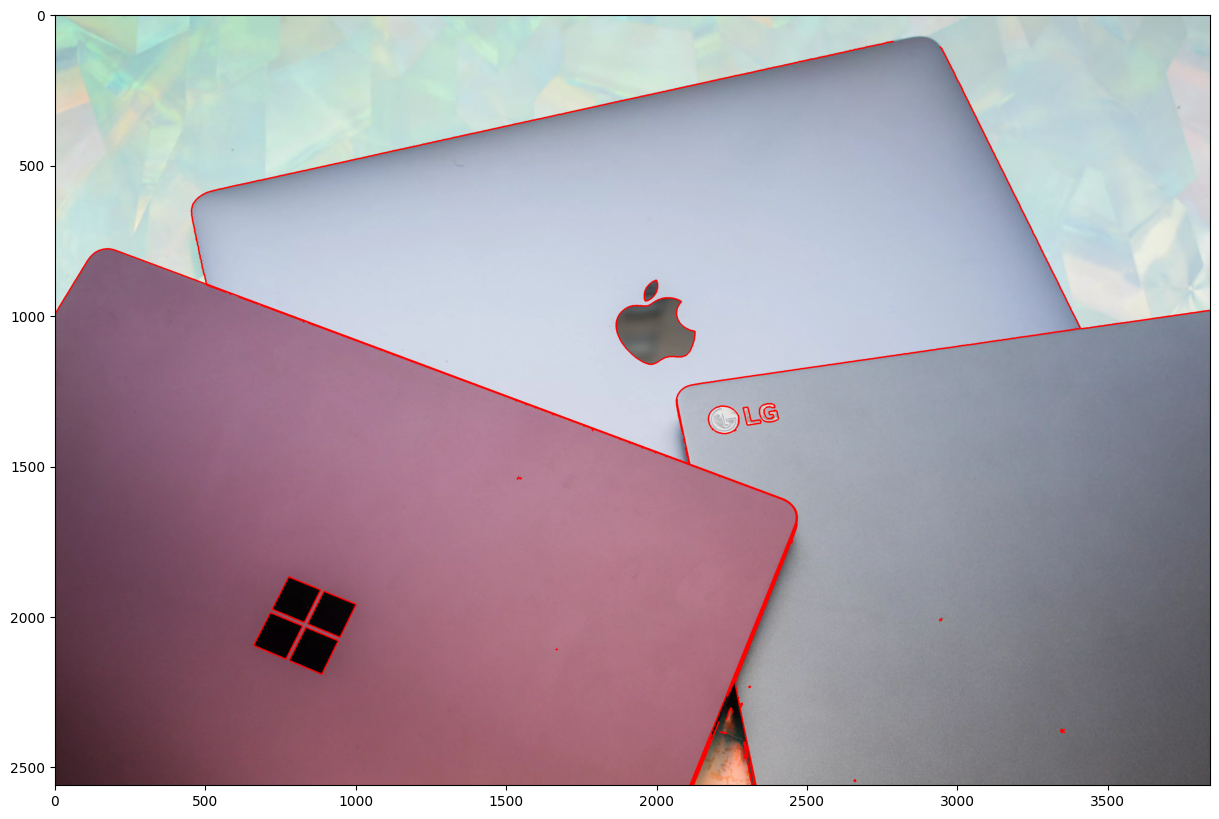

In [16]:
img = cv.imread('/content/drive/MyDrive/PCVK/Image/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# deteksi tepi gambar menggunakan metode canny dengan nilai threshold awal 30 dan akhir 200
edged = cv.Canny(img_gray, 30, 200)

#countur dari edge
# cv.RETR_EXTERNAL = mencari kontur paling luar 
#cv.CHAIN_APPROX_NONE = tidak melakukan aproksimasi pada titik-titik kontur
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))